In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['figure.figsize'] = (12,6)

import numpy as np
import pandas as pd
import seaborn as sns

import os
import torch
from spiking_layer import *

In [3]:
num_layers = 1
num_neurons = 1500
square_size = 28

In [7]:
net = SpikingNN(num_layers, num_neurons, square_size, (2, 5), num_timesteps=1000)

In [8]:
inp = torch.rand((1, 1, 28, 28))
out = net(inp)

(1000, 1500) 0.030484


Text(0,0.5,'Activation over time')

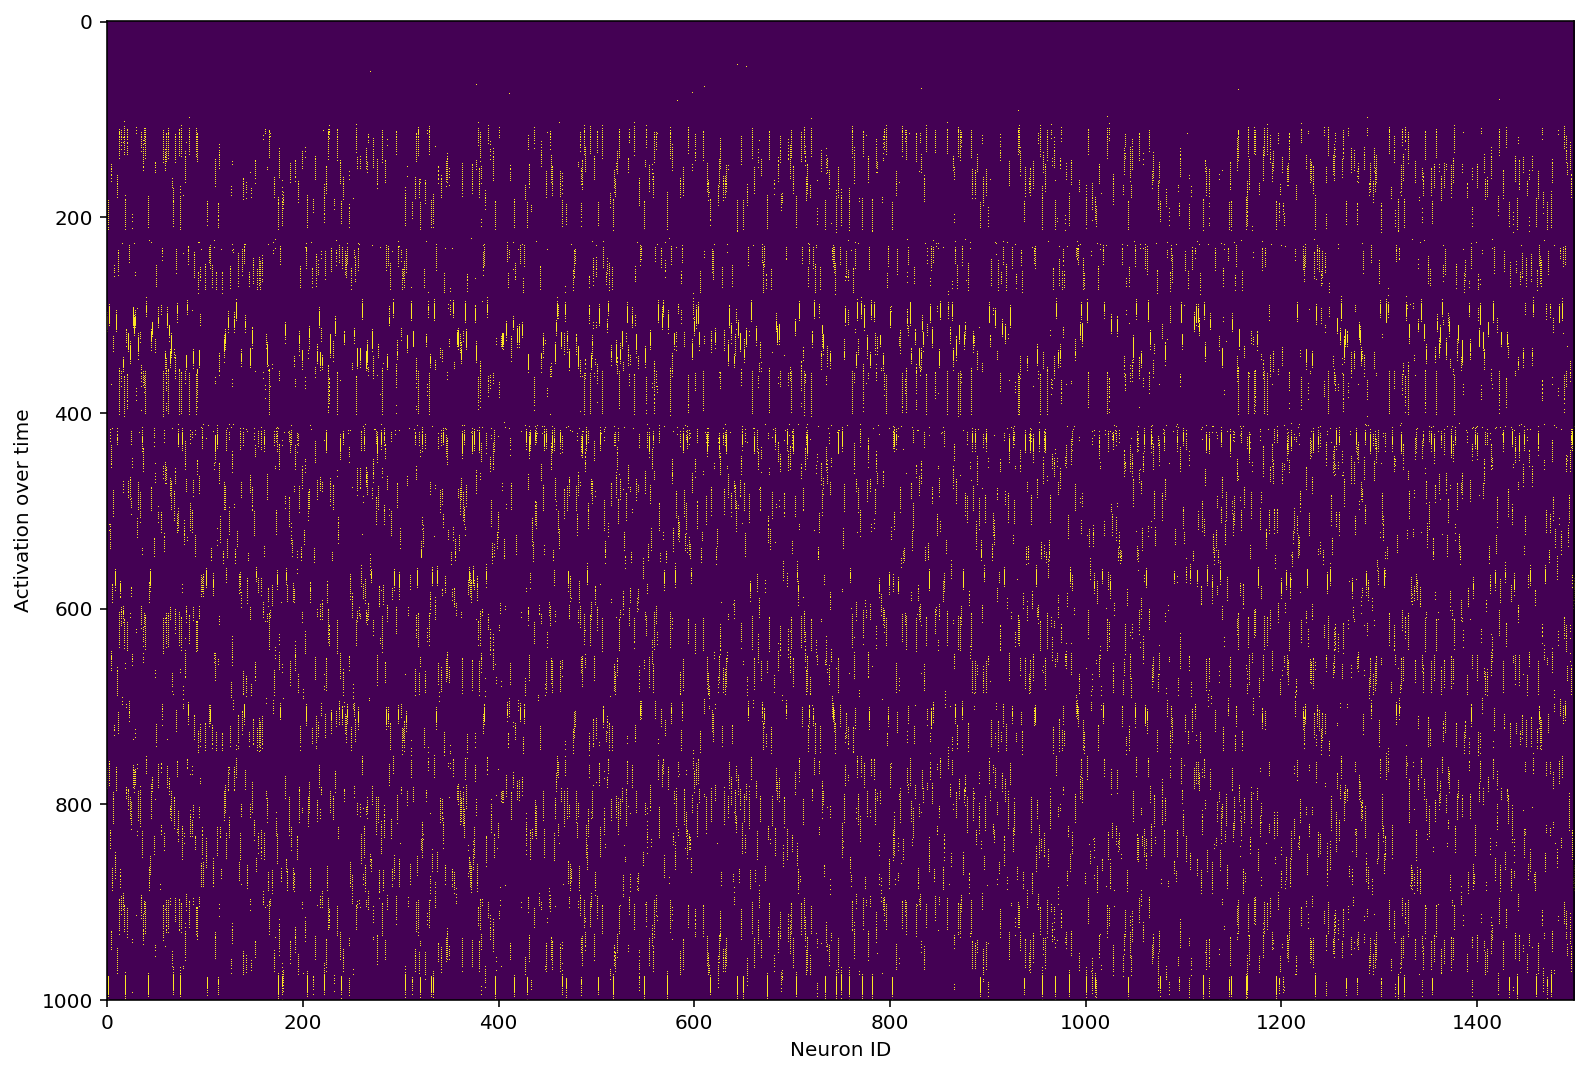

In [9]:
plt.figure(figsize=(18,9))
out = np.array(out)
print(out.shape, np.mean(out))
plt.imshow(out)
plt.xlabel('Neuron ID')
plt.ylabel('Activation over time')

In [ ]:
l = net.layer[0]
vs = [n.v for n in l.nodes]
vs

In [ ]:
net = SpikingNN(num_layers, 1500, square_size, (2, 4), num_timesteps=500)
inp = torch.rand((1, 1, 28, 28))
out = net(inp)

In [ ]:
for n in net.layer[0].nodes:
    if np.isnan(n.v.item()):
        print("breaking")
        break

In [ ]:
l = net.layer[0]
vs = [n.v for n in l.nodes]
for idx, v in enumerate(vs):
    if v > 30.0:
        print(idx)

In [10]:
fig = plt.figure()

for i in range(1000):
    

(1000, 1500)


<Figure size 432x288 with 0 Axes>

18.643005


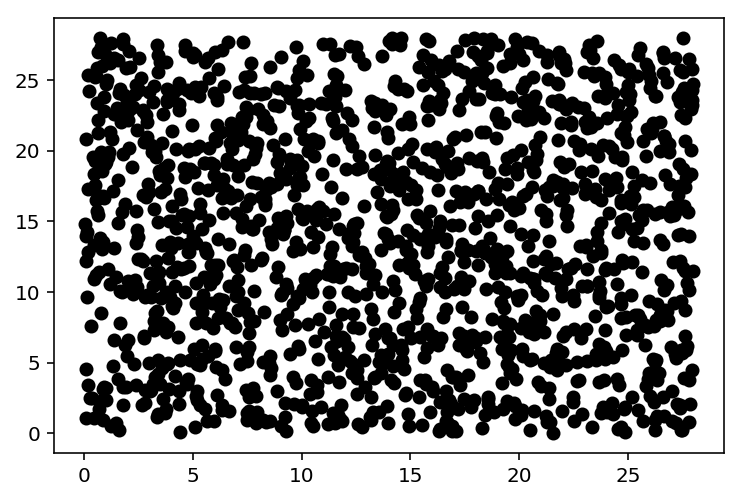

In [33]:
fig = plt.figure();

# plot all nodes in square

'''for n in l.nodes:
    
    pos = n.pos;
    plt.scatter(pos[0], pos[1],'k')
    plt.hold
   ''' 
posMat = np.zeros([1500,2]);
allNodePos = [n.pos.numpy() for n in l.nodes];

print(allNodePos[0][1])

for i in range(len(allNodePos)):
    posMat[i,0] = allNodePos[i][0];
    posMat[i,1] = allNodePos[i][1];
    
plt.scatter(posMat[:,0], posMat[:,1],color='k')




In [52]:
del i, l, j

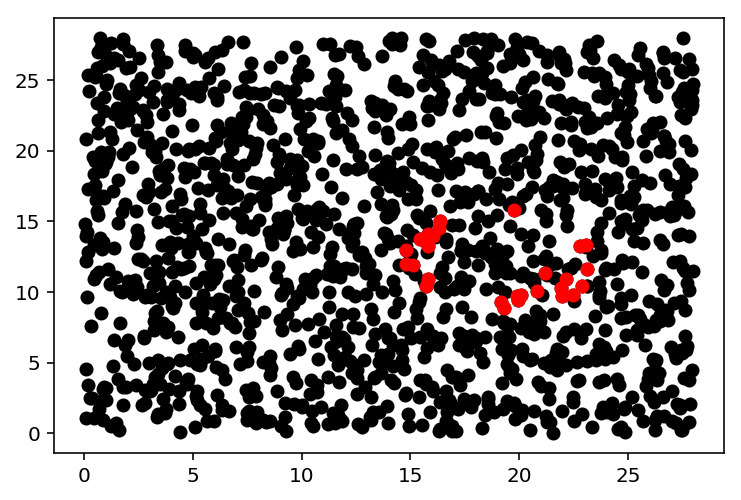

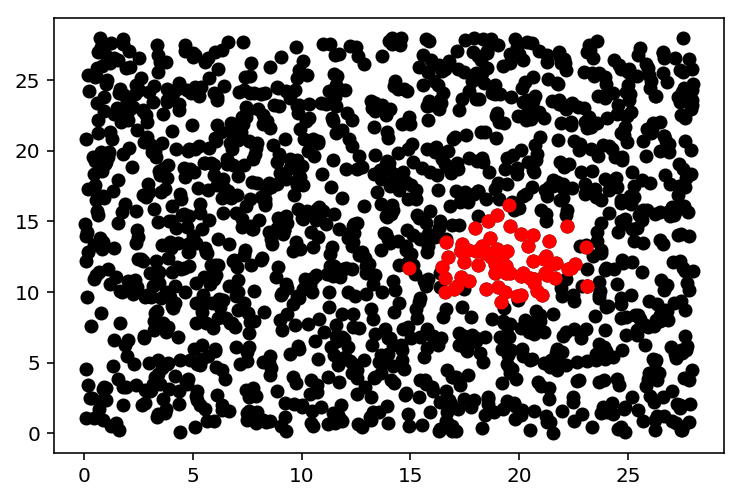

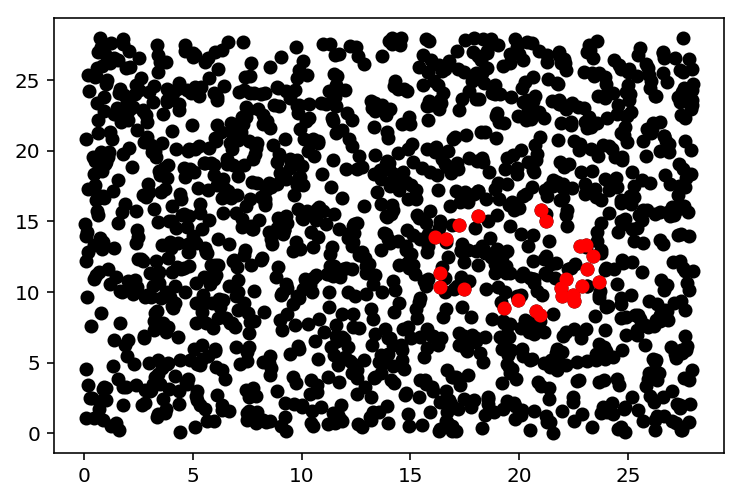

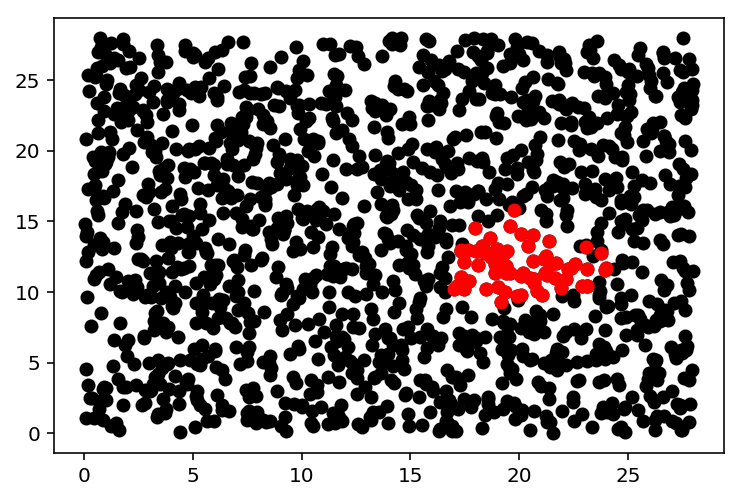

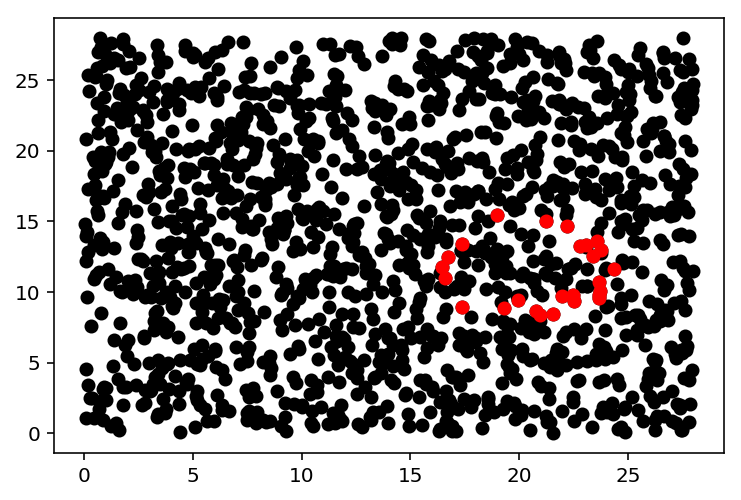

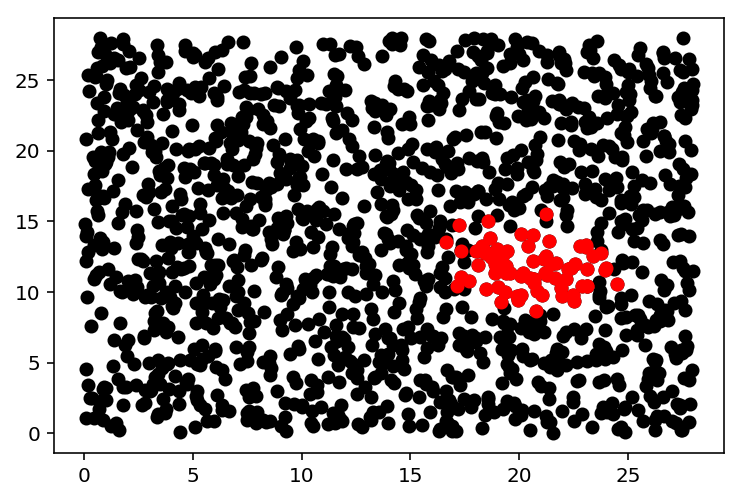

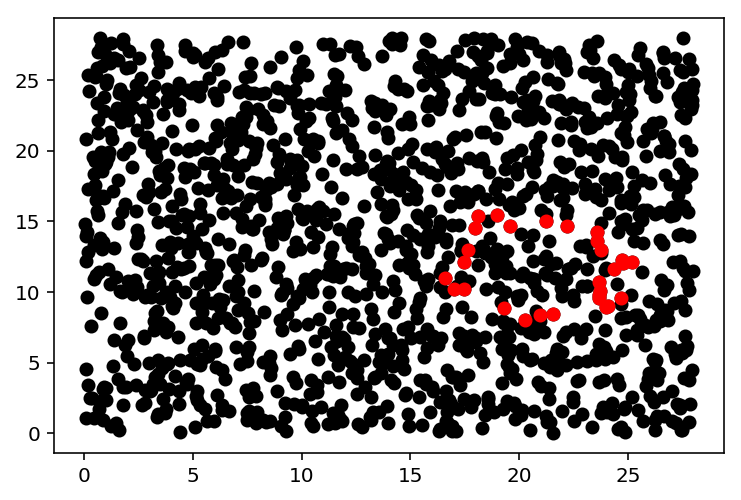

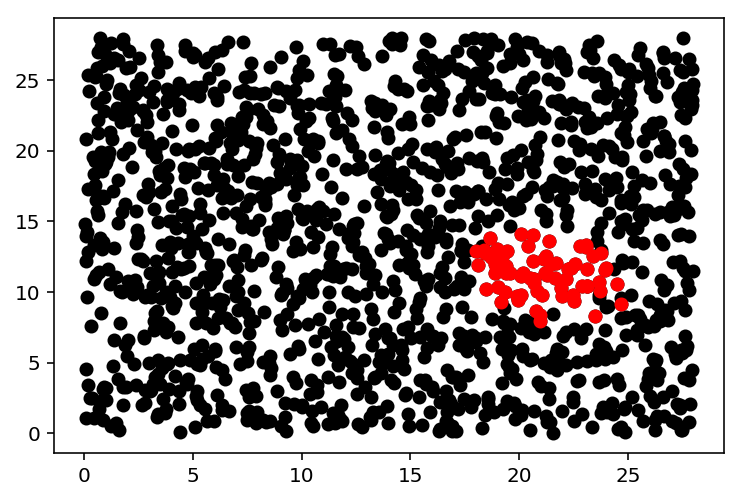

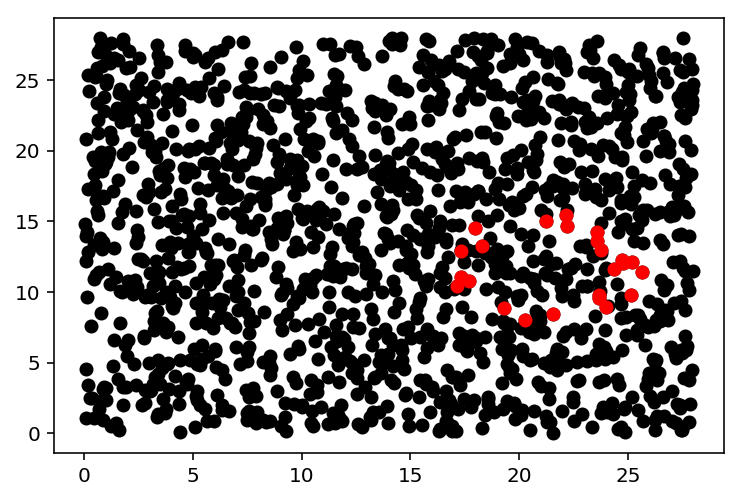

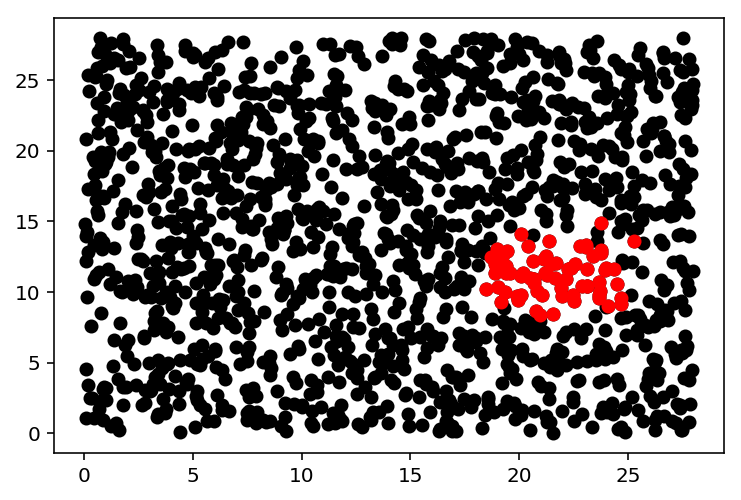

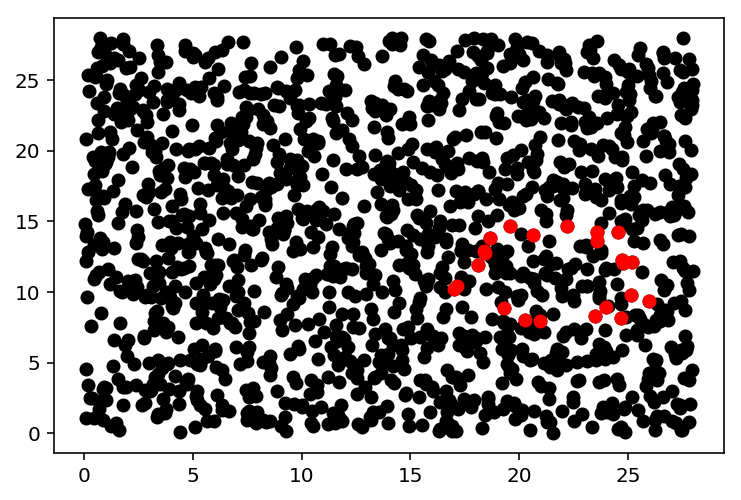

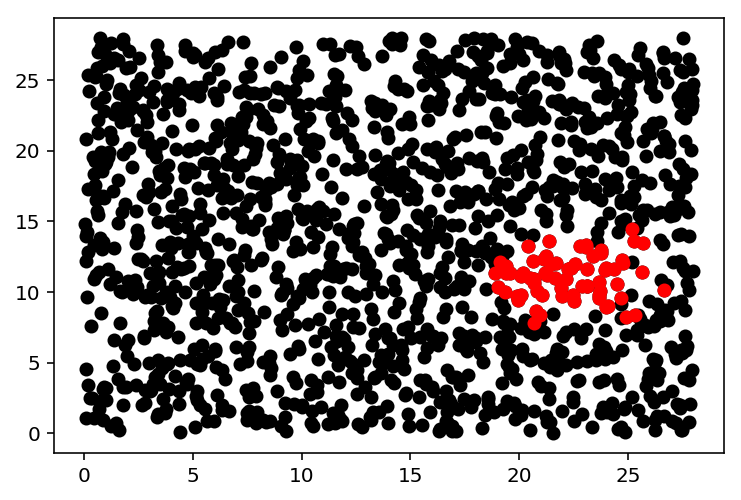

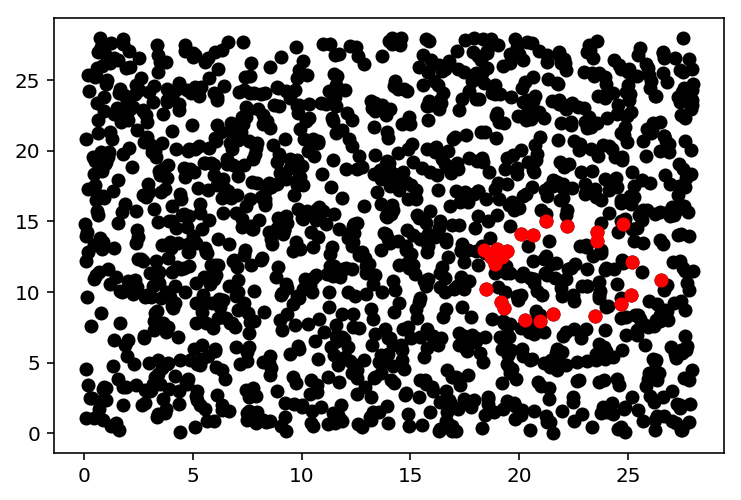

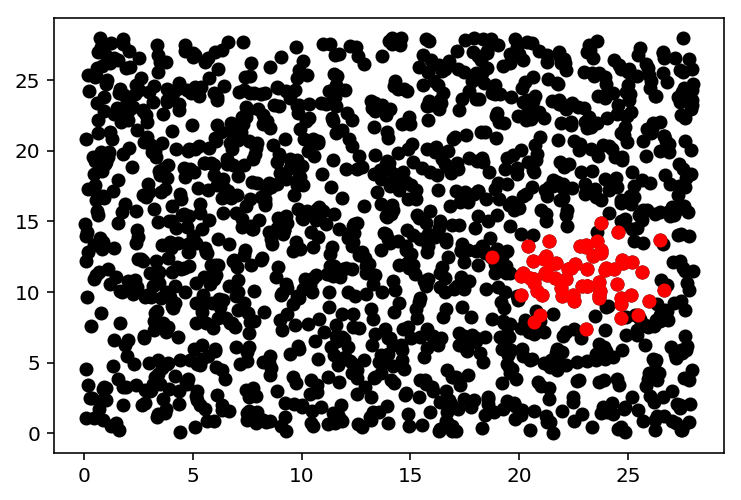

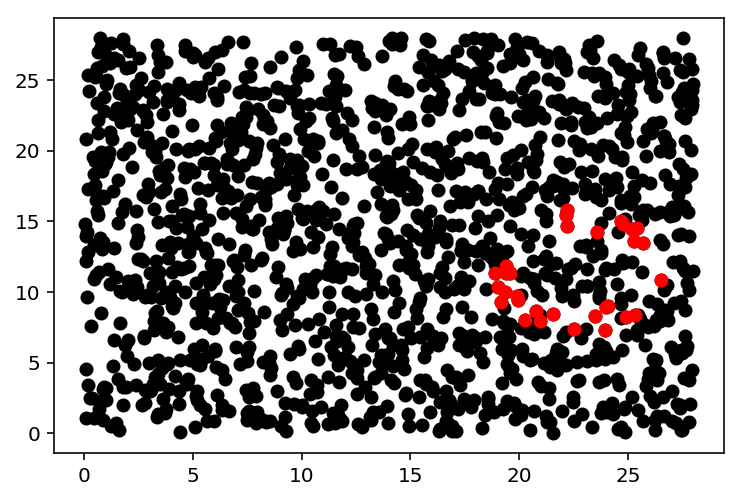

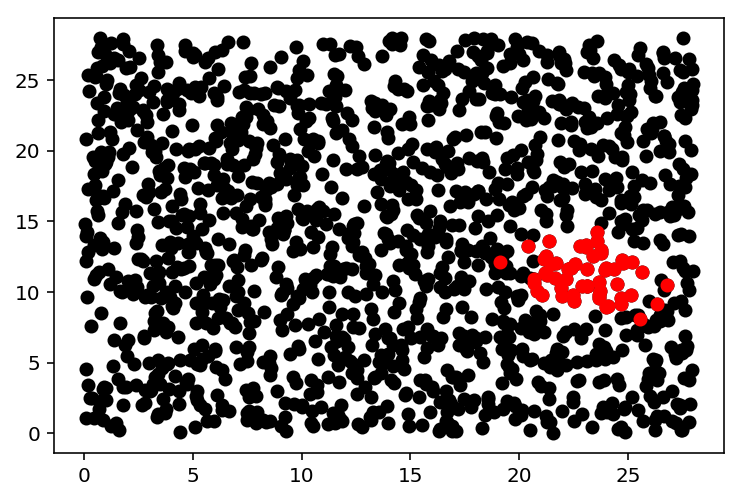

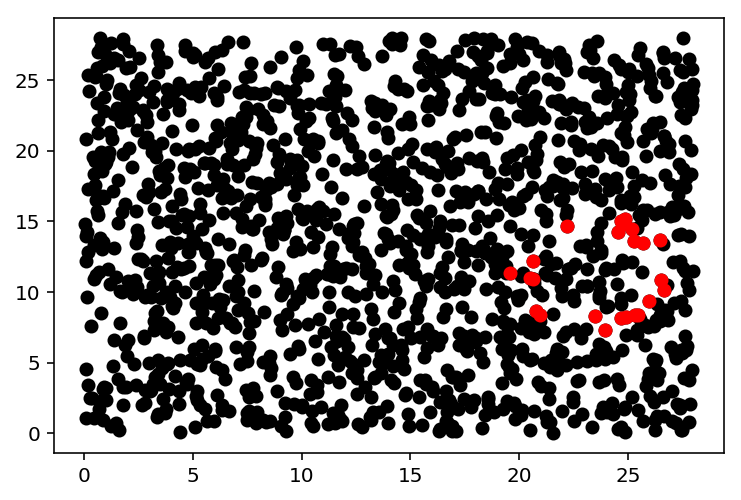

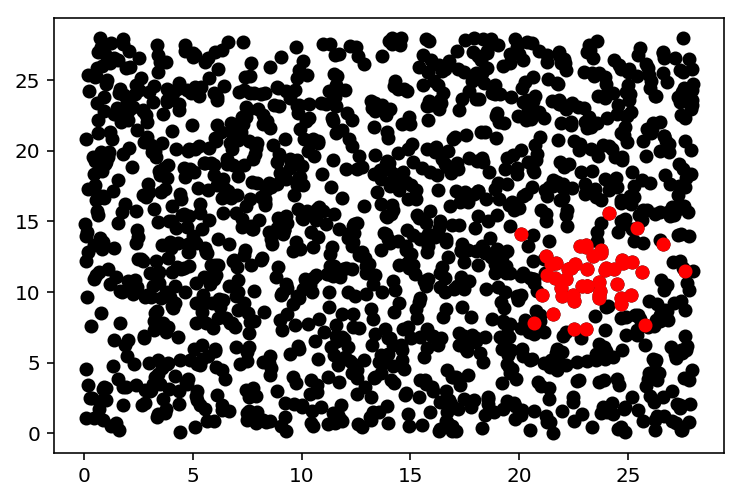

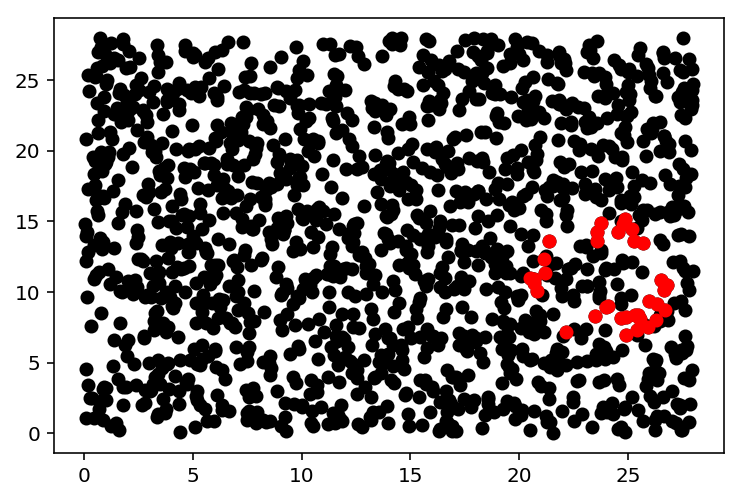

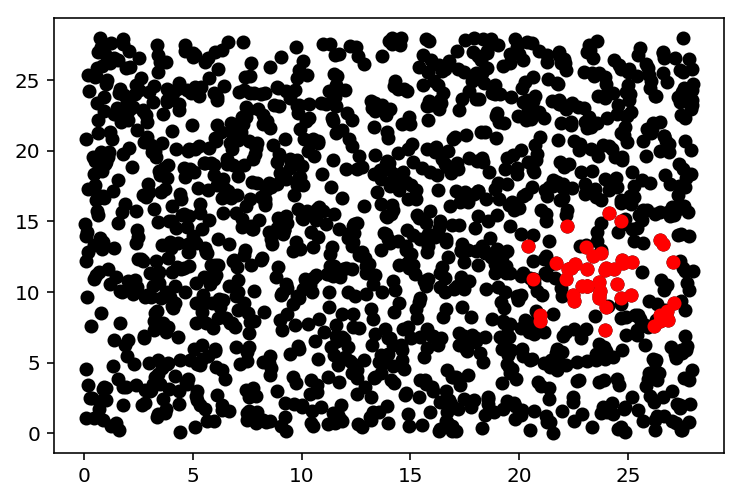

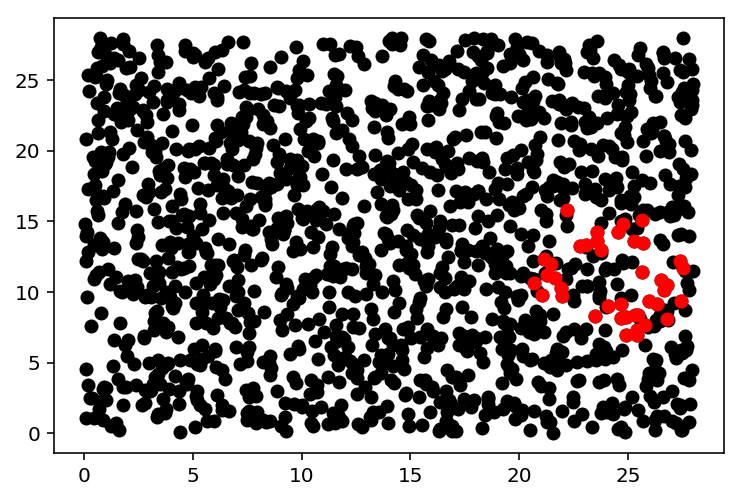

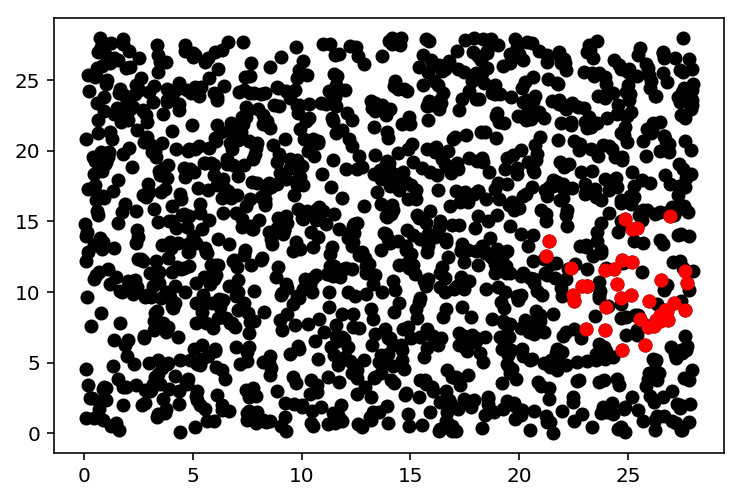

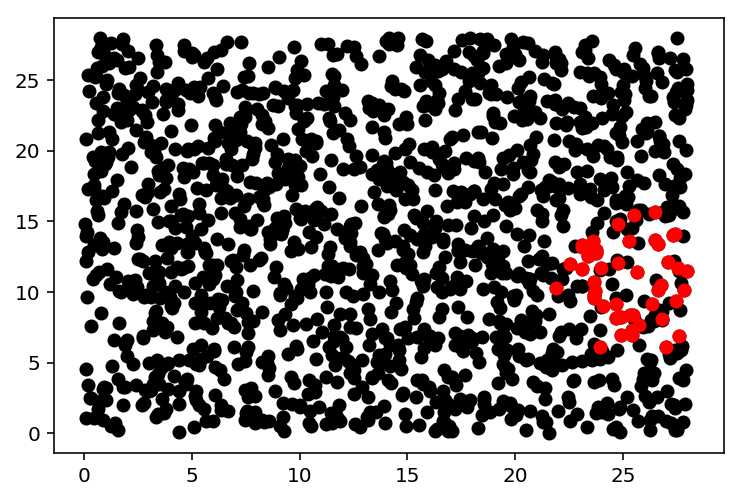

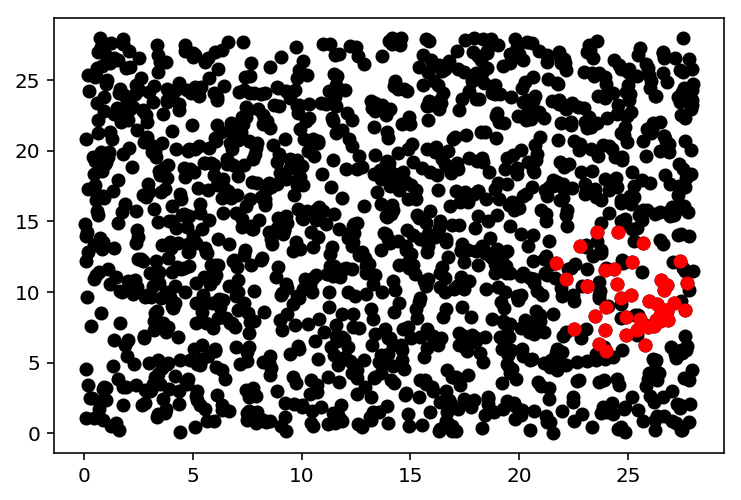

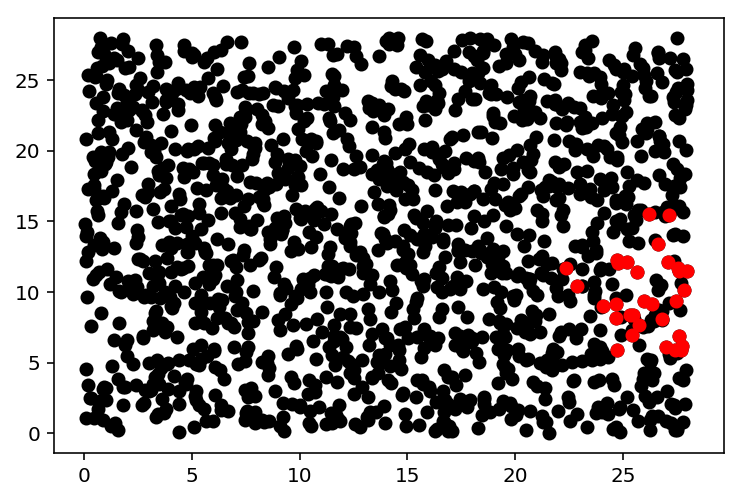

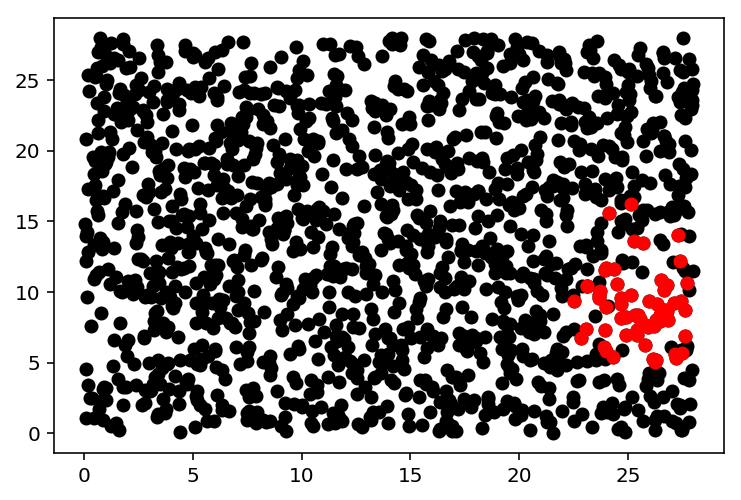

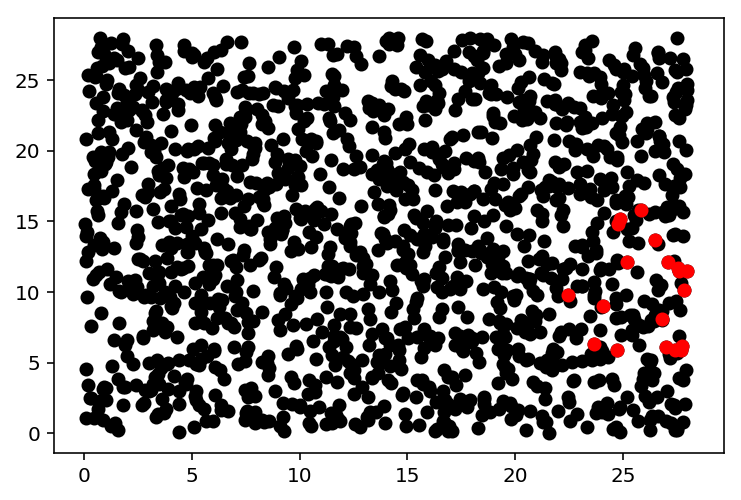

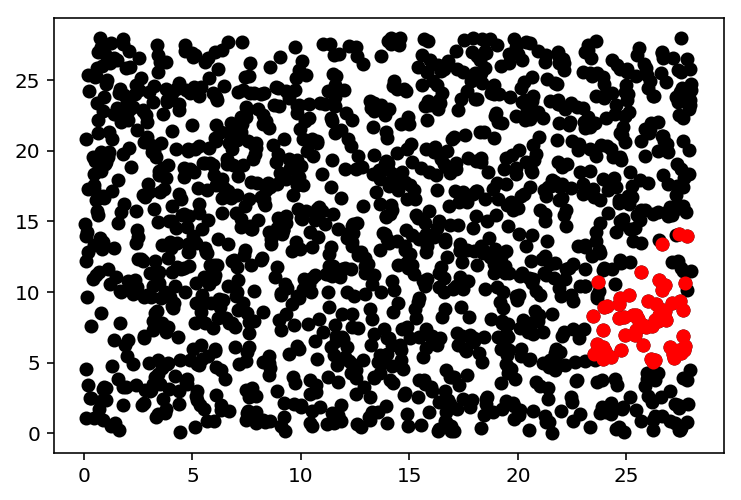

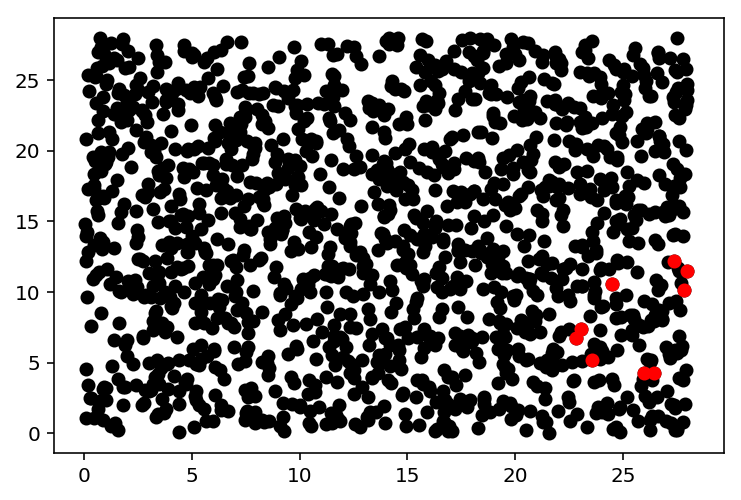

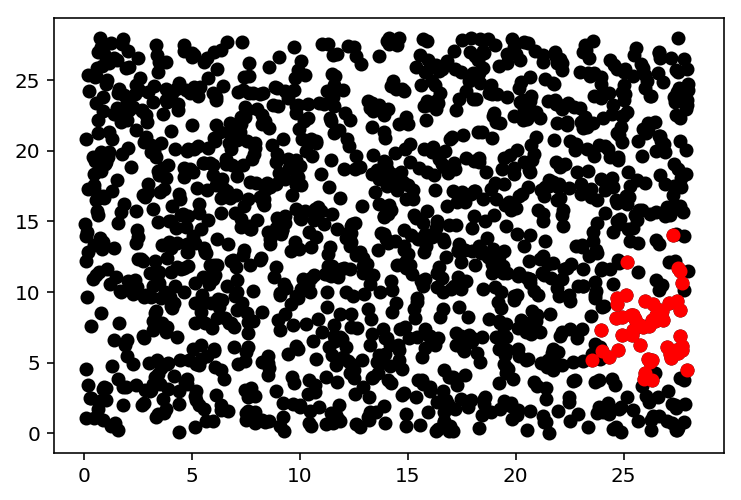

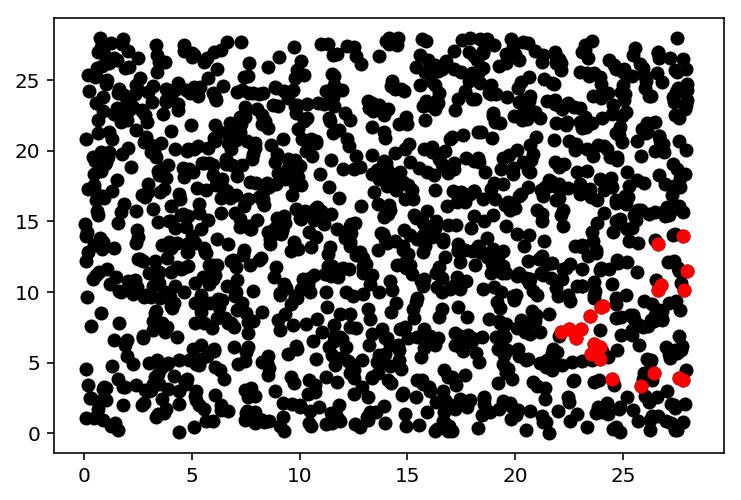

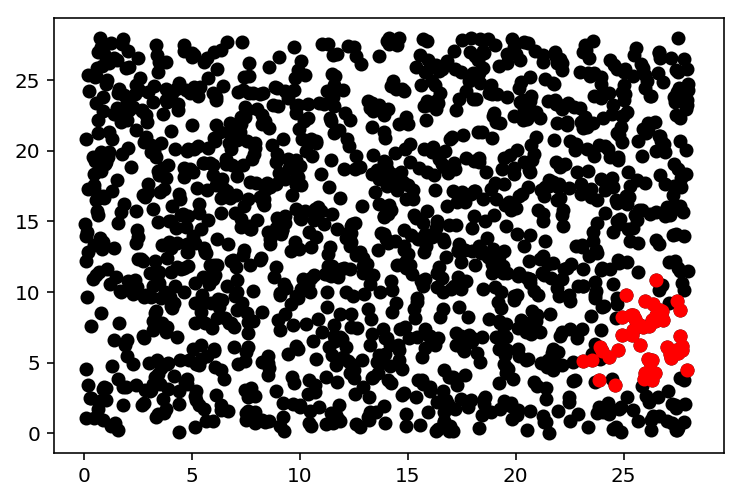

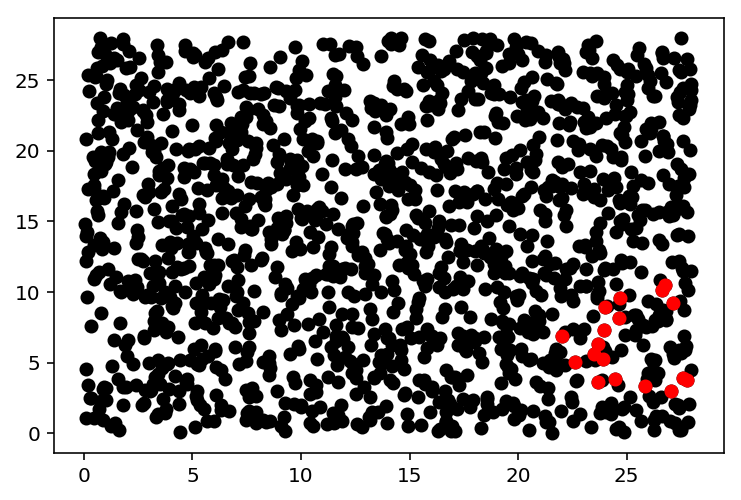

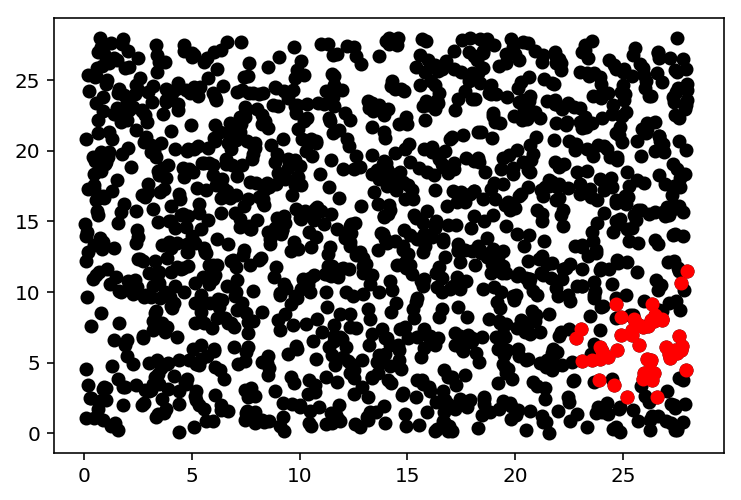

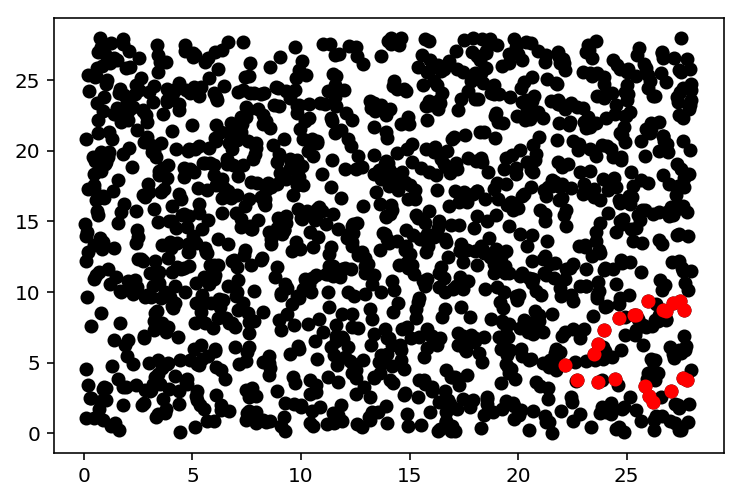

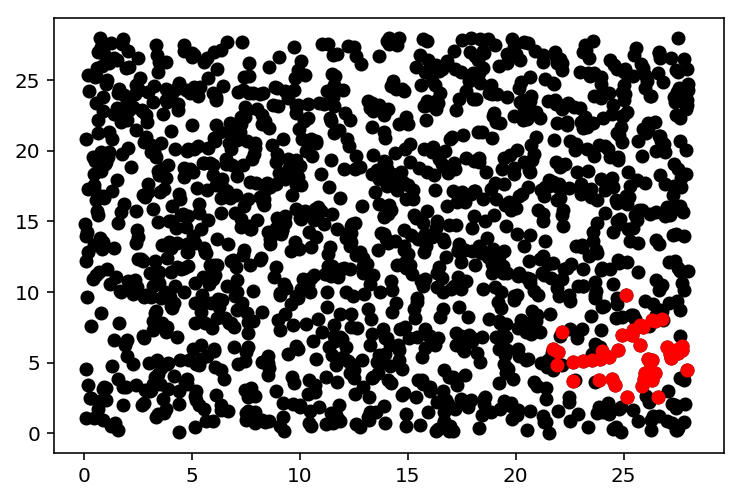

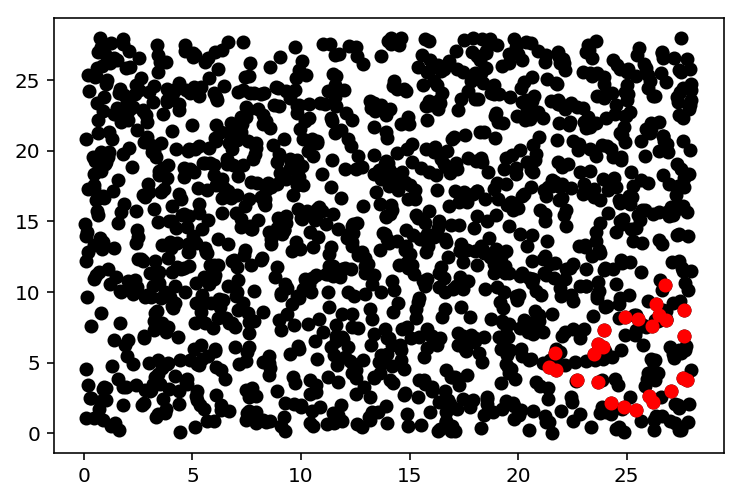

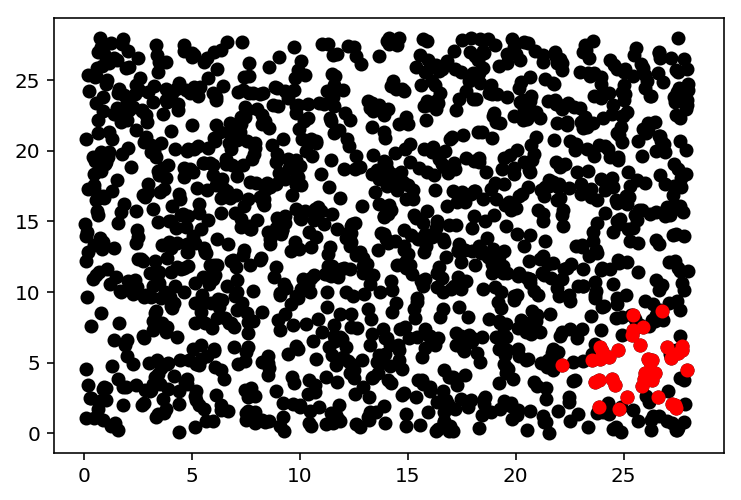

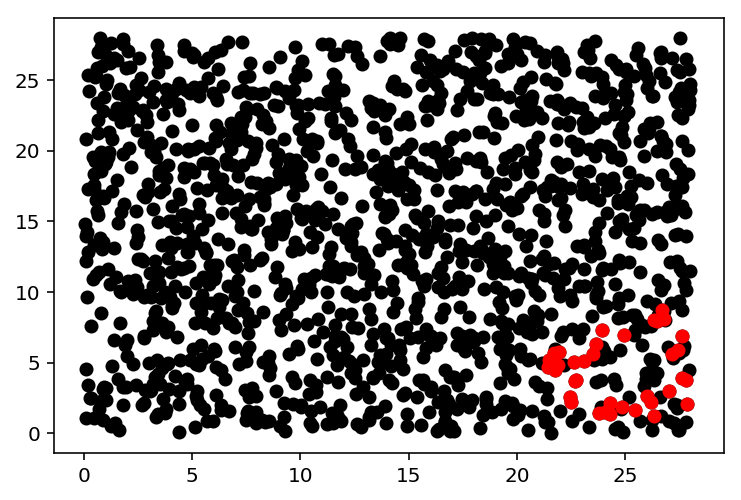

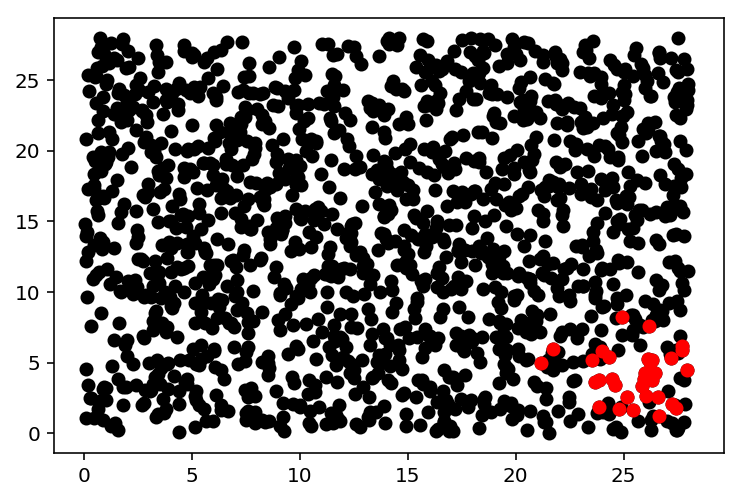

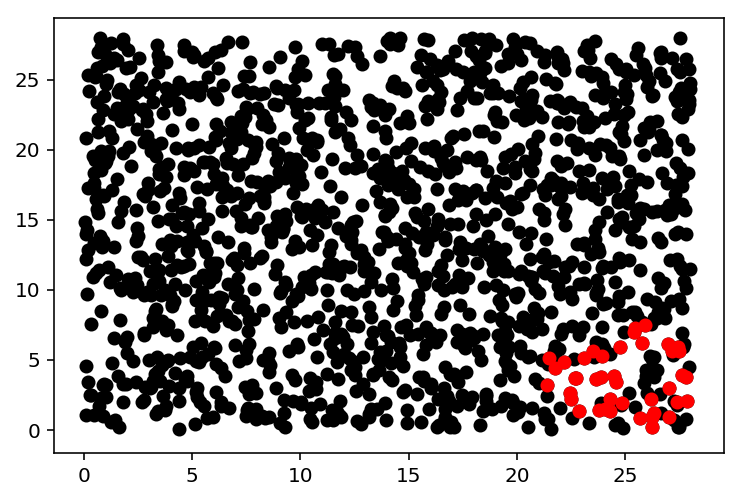

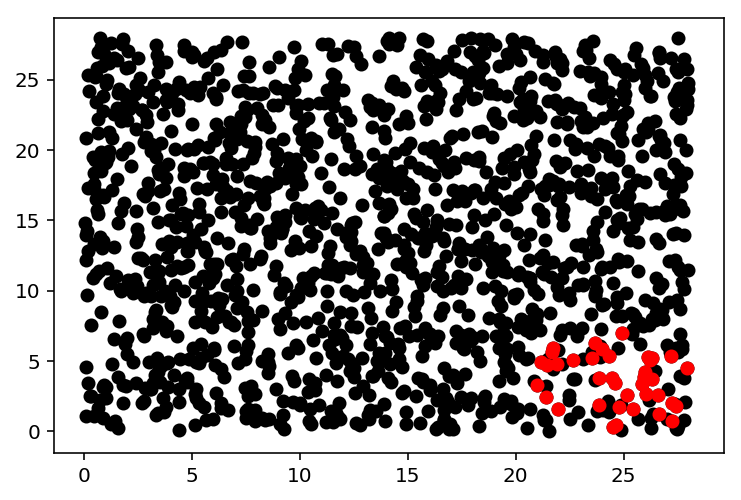

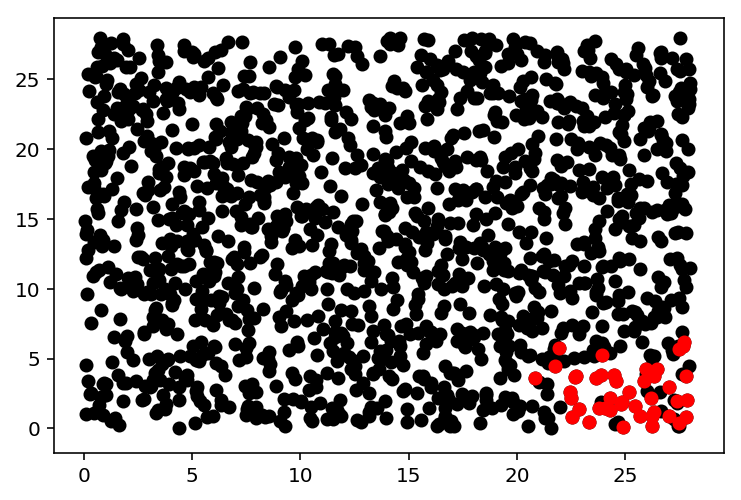

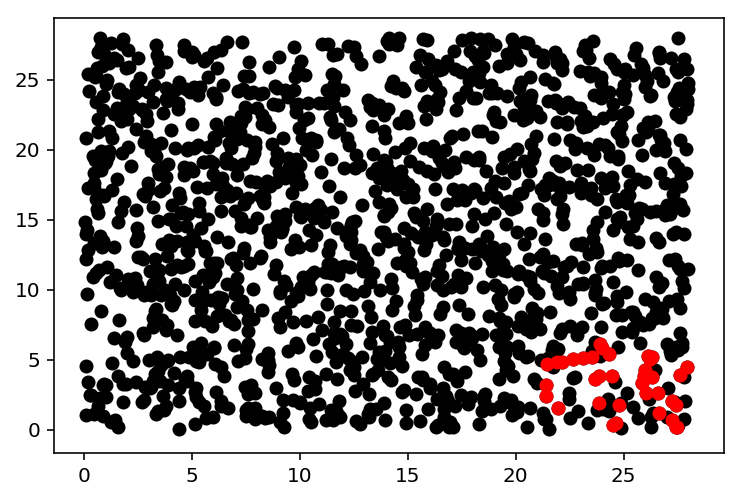

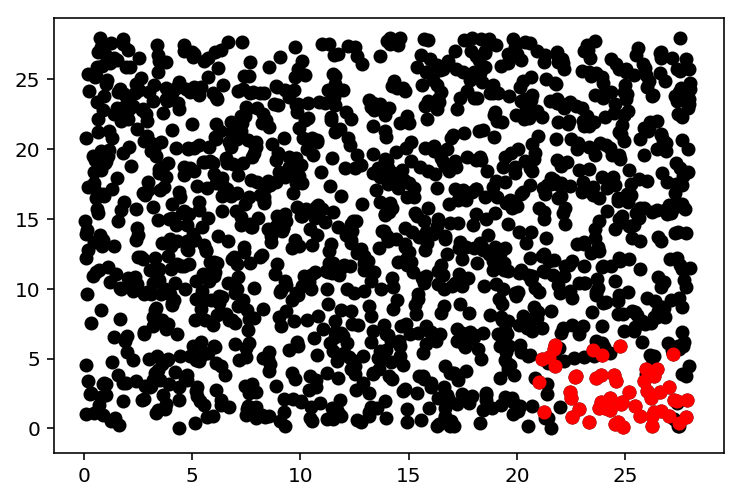

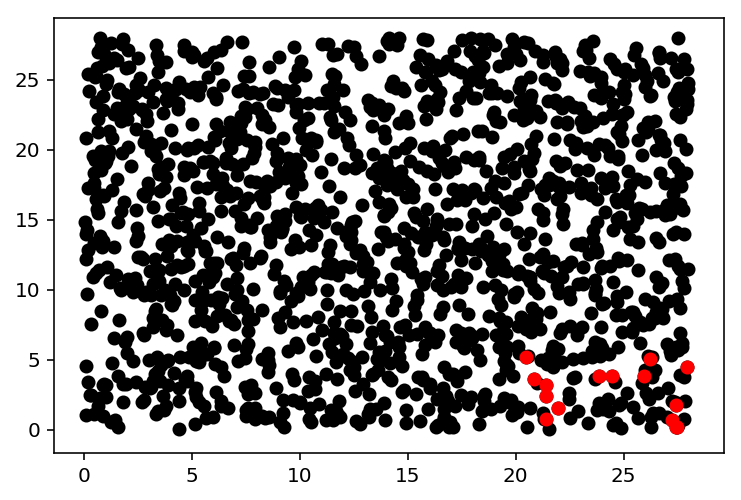

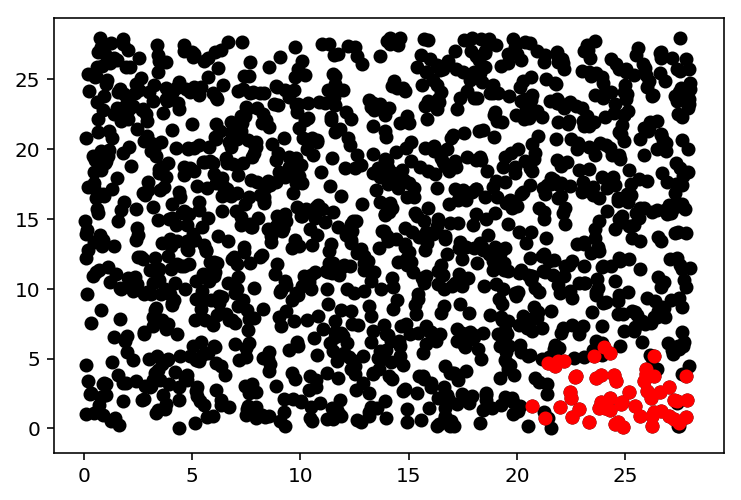

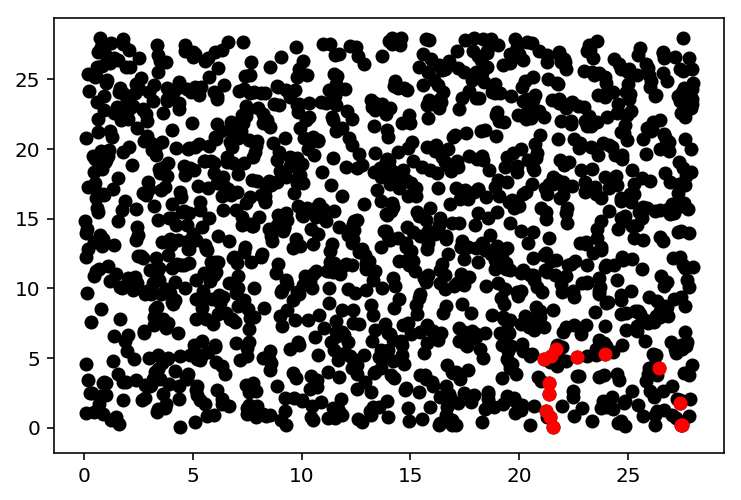

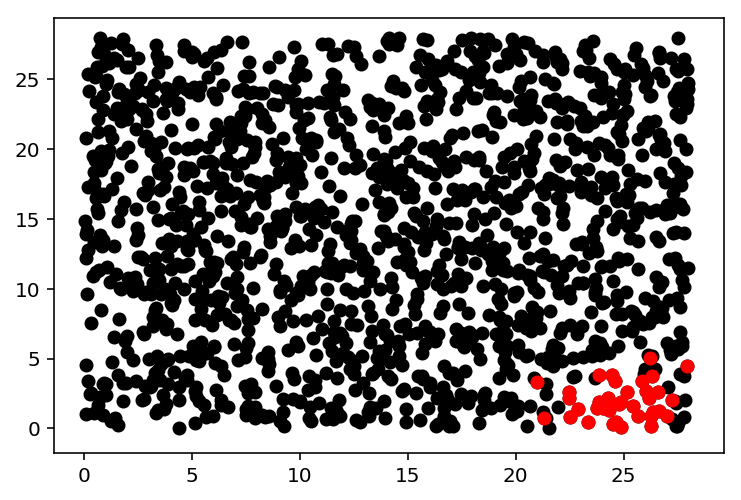

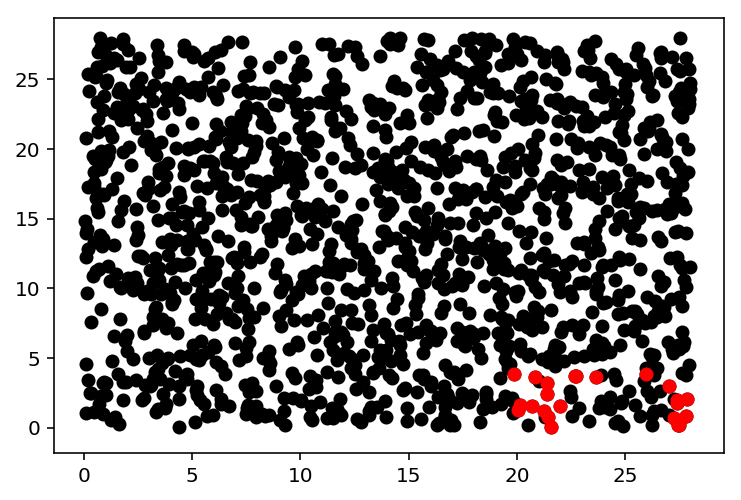

In [60]:
l = net.layer[0];

fig = plt.figure()

# Plot all


for i in range(500,550,1):   
    
    
    # Find spiking nodes at t=i
    idx = np.argwhere(out[i,:]==1);
    flat_idx = [item for sublist in idx for item in sublist]


    pos_firing = np.zeros([len(idx),2]);
    
    ctr = 0;
    for j in flat_idx:
        tNode = l.nodes[j]
        pos2= tNode.pos.numpy();
        pos_firing[ctr,0] = pos2[0]
        pos_firing[ctr,1] = pos2[1];
        ctr += 1
    
    plt.scatter(posMat[:,0], posMat[:,1],color='k')
    plt.hold
    plt.scatter(pos_firing[:,0],pos_firing[:,1],color='r')
    plt.pause(0.3)
    


In [46]:
print(l.nodes[45])

Node()


In [55]:
for j in idx:
    print(j[0])

45
87
148
173
283
304
365
446
470
479
491
651
667
711
769
885
989
1099
1138
1150
1159
1187
1192
1196
1285
1436
1470


In [57]:
idx = np.argwhere(out[i,:]==1);

In [59]:
print(idx)

[[  45]
 [  87]
 [ 148]
 [ 173]
 [ 283]
 [ 304]
 [ 365]
 [ 446]
 [ 470]
 [ 479]
 [ 491]
 [ 651]
 [ 667]
 [ 711]
 [ 769]
 [ 885]
 [ 989]
 [1099]
 [1138]
 [1150]
 [1159]
 [1187]
 [1192]
 [1196]
 [1285]
 [1436]
 [1470]]
